# GIỚI THIỆU VÀ NHỮNG THAO TÁC CƠ BẢN TRÊN POLARS
- **NHÓM: TOMATO**

In [ ]:
# Cài đặt Polars
# %pip install polars==0.20.2

In [ ]:
# %pip install graphviz

In [1]:
import polars as pl
import pandas as pd
import datetime
import graphviz
import warnings
warnings.filterwarnings("ignore")
print(pl.__version__)

0.20.2


### 1. Tạo DataFrame
- `Column Storage`: Lưu trữ dữ liệu theo cột giúp tăng tốc độ truy xuất dữ liệu.
- `No index`: Trong Polars không dùng index như Pandas  => Xử lý song song, tăng tốc độ tính toán đối với dữ liêu lớn.
- Cú pháp đọc dữ liệu của Pandas và Polars tương đối giống như `read_csv`, `read_json`, `read_parquet`,...

In [26]:
data = {
    "name": ["Alice", "Bob", "Charlie", "David", "Eva"], # Dữ liệu String

    "gender": pl.Series(["F", "M", "M", "M", "F"]).cast(pl.Categorical), # Dữ liệu Categorical

    "birthday": [datetime.date(1998, 5, 21), datetime.date(1993, 8, 15), datetime.date(1988, 2, 10),
                 datetime.date(1983, 12, 23), datetime.date(1978, 7, 30)], # Dữ liệu Date

    "salary": [50000, 60000, 55000, 45000, 70000], # Dữ liệu Integer (Uint & Int)

    "performance": [0.8, 0.75, 0.85, 0.9, 0.95], # Dữ liệu Float

    "full_time": [True, True, False, True, False], # Dữ liệu Boolean
}
df = pl.DataFrame(data)
print(df)

# Cú pháp của Pandas
# pandas_df = pd.DataFrame(data)
# pandas_df

shape: (5, 6)
┌─────────┬────────┬────────────┬────────┬─────────────┬───────────┐
│ name    ┆ gender ┆ birthday   ┆ salary ┆ performance ┆ full_time │
│ ---     ┆ ---    ┆ ---        ┆ ---    ┆ ---         ┆ ---       │
│ str     ┆ cat    ┆ date       ┆ i64    ┆ f64         ┆ bool      │
╞═════════╪════════╪════════════╪════════╪═════════════╪═══════════╡
│ Alice   ┆ F      ┆ 1998-05-21 ┆ 50000  ┆ 0.8         ┆ true      │
│ Bob     ┆ M      ┆ 1993-08-15 ┆ 60000  ┆ 0.75        ┆ true      │
│ Charlie ┆ M      ┆ 1988-02-10 ┆ 55000  ┆ 0.85        ┆ false     │
│ David   ┆ M      ┆ 1983-12-23 ┆ 45000  ┆ 0.9         ┆ true      │
│ Eva     ┆ F      ┆ 1978-07-30 ┆ 70000  ┆ 0.95        ┆ false     │
└─────────┴────────┴────────────┴────────┴─────────────┴───────────┘


,name,gender,birthday,salary,performance,full_time
0,Alice,F,1998-05-21,50000,0.80,True
1,Bob,M,1993-08-15,60000,0.75,True
2,Charlie,M,1988-02-10,55000,0.85,False
3,David,M,1983-12-23,45000,0.90,True
4,Eva,F,1978-07-30,70000,0.95,False


- Những thao tác hiển thị dữ liệu của `Polars` giống với `Pandas` :
- `head()`, `tail()`, `sample()`,  `shape`, `columns`, `dtypes`, `describe()`

In [3]:
# Thao tác hiển thị dữ liệu giống nhau giữa Polars và Pandas
print(df[1:3, ["name", "gender"]])
print(df[1:3, 0:2])

# Cú pháp trong Pandas
# pandas_df.iloc[1:3, 0:2]
# pandas_df.loc[1:3, "name":"gender"]

shape: (2, 2)
┌─────────┬────────┐
│ name    ┆ gender │
│ ---     ┆ ---    │
│ str     ┆ cat    │
╞═════════╪════════╡
│ Bob     ┆ M      │
│ Charlie ┆ M      │
└─────────┴────────┘
shape: (2, 2)
┌─────────┬────────┐
│ name    ┆ gender │
│ ---     ┆ ---    │
│ str     ┆ cat    │
╞═════════╪════════╡
│ Bob     ┆ M      │
│ Charlie ┆ M      │
└─────────┴────────┘


,name,gender
1,Bob,M
2,Charlie,M


## 2.Theo tác cơ bản của dữ liệu

### 2.1 Thêm cột và xóa cột cho dữ liệu
- Trong Polars, ta không thể gán trực tiếp một Series vào một cột của DataFrame bằng cách sử dụng cú pháp df["column"] = ... như trong pandas. Bởi vì trong Polars không thể gán bằng `index`. Thay vào đó, ta cần sử dụng phương thức with_columns() để thêm một cột mới hoặc thay thế một cột hiện có.

In [27]:
# Thêm cột Department vào DataFrame
df = df.with_columns(pl.Series("department",["HR", "Marketing", "HR", "IT", "Finance"]))

# Cú pháp của Pandas
pandas_df["department"] = ["HR", "Marketing", "HR", "IT", "Finance"]

In [28]:
current_year = datetime.datetime.now().year
df = df.with_columns(
    (current_year - pl.col("birthday").dt.year()).alias("age")
)
# Xóa cột birthday
df = df.drop("birthday")
print(df)

# Cú pháp của Pandas
# pandas_df["birthday"] = pd.to_datetime(pandas_df["birthday"])
# pandas_df["age"] = current_year - pandas_df["birthday"].dt.year
# pandas_df = pandas_df.drop("birthday", axis=1)
# pandas_df

shape: (5, 7)
┌─────────┬────────┬────────┬─────────────┬───────────┬────────────┬─────┐
│ name    ┆ gender ┆ salary ┆ performance ┆ full_time ┆ department ┆ age │
│ ---     ┆ ---    ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ --- │
│ str     ┆ cat    ┆ i64    ┆ f64         ┆ bool      ┆ str        ┆ i32 │
╞═════════╪════════╪════════╪═════════════╪═══════════╪════════════╪═════╡
│ Alice   ┆ F      ┆ 50000  ┆ 0.8         ┆ true      ┆ HR         ┆ 26  │
│ Bob     ┆ M      ┆ 60000  ┆ 0.75        ┆ true      ┆ Marketing  ┆ 31  │
│ Charlie ┆ M      ┆ 55000  ┆ 0.85        ┆ false     ┆ HR         ┆ 36  │
│ David   ┆ M      ┆ 45000  ┆ 0.9         ┆ true      ┆ IT         ┆ 41  │
│ Eva     ┆ F      ┆ 70000  ┆ 0.95        ┆ false     ┆ Finance    ┆ 46  │
└─────────┴────────┴────────┴─────────────┴───────────┴────────────┴─────┘


,name,gender,salary,performance,full_time,department,age
0,Alice,F,50000,0.80,True,HR,26
1,Bob,M,60000,0.75,True,Marketing,31
2,Charlie,M,55000,0.85,False,HR,36
3,David,M,45000,0.90,True,IT,41
4,Eva,F,70000,0.95,False,Finance,46


In [6]:
# Dưa về Int64
df = df.with_columns(pl.col("age").cast(pl.Int64))

# Cú pháp của Pandas
# pandas_df["age"] = pandas_df["age"].astype("Int64")

### 2.2 Select columns và filter rows dữ liệu
  - Lấy cảm hứng từ `Spark SQL` và `Pandas`, `Polars` cũng hỗ trợ cú pháp `SELECT COLUMNS` và `FILTER ROWS` như sau:
  - Cú pháp SELECT COLUMNS: `df.select(["colName1", "colName2"])` ~ `df[["colName1", "colName2"]]` ~ `df.select([pl.col("colName1"), pl.col("colName2")])`
  - Cú pháp FILTER ROWS: `df.filter(pl.col("colName") > 10)`

In [7]:
# Chọn dữ liệu theo cột name, salary, department
print(df.select(["name", "salary", "department"]))

# Cú pháp của Pandas
# pandas_df[["name", "salary", "department"]]
# pandas_df.loc[:, ["name", "salary", "department"]]

# Lọc những nam giới làm toàn thời gian
print(df.filter((pl.col("gender") == "M") & (pl.col("full_time"))))

# Cú pháp của Pandas
# pandas_df[(pandas_df["gender"] == "M") & (pandas_df["full_time"])]

shape: (5, 3)
┌─────────┬────────┬────────────┐
│ name    ┆ salary ┆ department │
│ ---     ┆ ---    ┆ ---        │
│ str     ┆ i64    ┆ str        │
╞═════════╪════════╪════════════╡
│ Alice   ┆ 50000  ┆ HR         │
│ Bob     ┆ 60000  ┆ Marketing  │
│ Charlie ┆ 55000  ┆ HR         │
│ David   ┆ 45000  ┆ IT         │
│ Eva     ┆ 70000  ┆ Finance    │
└─────────┴────────┴────────────┘
shape: (2, 7)
┌───────┬────────┬────────┬─────────────┬───────────┬────────────┬─────┐
│ name  ┆ gender ┆ salary ┆ performance ┆ full_time ┆ department ┆ age │
│ ---   ┆ ---    ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ --- │
│ str   ┆ cat    ┆ i64    ┆ f64         ┆ bool      ┆ str        ┆ i64 │
╞═══════╪════════╪════════╪═════════════╪═══════════╪════════════╪═════╡
│ Bob   ┆ M      ┆ 60000  ┆ 0.75        ┆ true      ┆ Marketing  ┆ 31  │
│ David ┆ M      ┆ 45000  ┆ 0.9         ┆ true      ┆ IT         ┆ 41  │
└───────┴────────┴────────┴─────────────┴───────────┴────────────┴─────┘


In [ ]:
# Kết hợp cả 2 để lọc dữ liệu
print(df.filter((pl.col("gender") == "M") & (pl.col("full_time"))).select(["name", "salary", "department"]))
# Cú pháp của Pandas
# pandas_df[(pandas_df["gender"] == "M") & (pandas_df["full_time"])][["name", "salary", "department"]]

shape: (2, 3)
┌───────┬────────┬────────────┐
│ name  ┆ salary ┆ department │
│ ---   ┆ ---    ┆ ---        │
│ str   ┆ i64    ┆ str        │
╞═══════╪════════╪════════════╡
│ Bob   ┆ 60000  ┆ Marketing  │
│ David ┆ 45000  ┆ IT         │
└───────┴────────┴────────────┘


,name,salary,department
1,Bob,60000,Marketing
3,David,45000,IT


### 2.3 Thao tác trên hàng cột: Sắp xếp, gom nhóm, đổi tên cột, đổi kiểu dữ liệu

- Thao tác `sắp xếp`

In [10]:
# Sắp xếp theo tuổi
sorted_df = df.sort("age").reverse()
print(sorted_df)

# Cú pháp của Pandas
# pandas_sorted_df = pandas_df.sort_values("age", ascending=False)
# pandas_sorted_df

shape: (5, 7)
┌─────────┬────────┬────────┬─────────────┬───────────┬────────────┬─────┐
│ name    ┆ gender ┆ salary ┆ performance ┆ full_time ┆ department ┆ age │
│ ---     ┆ ---    ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ --- │
│ str     ┆ cat    ┆ i64    ┆ f64         ┆ bool      ┆ str        ┆ i64 │
╞═════════╪════════╪════════╪═════════════╪═══════════╪════════════╪═════╡
│ Eva     ┆ F      ┆ 70000  ┆ 0.95        ┆ false     ┆ Finance    ┆ 46  │
│ David   ┆ M      ┆ 45000  ┆ 0.9         ┆ true      ┆ IT         ┆ 41  │
│ Charlie ┆ M      ┆ 55000  ┆ 0.85        ┆ false     ┆ HR         ┆ 36  │
│ Bob     ┆ M      ┆ 60000  ┆ 0.75        ┆ true      ┆ Marketing  ┆ 31  │
│ Alice   ┆ F      ┆ 50000  ┆ 0.8         ┆ true      ┆ HR         ┆ 26  │
└─────────┴────────┴────────┴─────────────┴───────────┴────────────┴─────┘


,name,gender,salary,performance,full_time,department,age
4,Eva,F,70000,0.95,False,Finance,46
3,David,M,45000,0.90,True,IT,41
2,Charlie,M,55000,0.85,False,HR,36
1,Bob,M,60000,0.75,True,Marketing,31
0,Alice,F,50000,0.80,True,HR,26


- Thao tác `groupping và aggregation`

In [11]:
# Tính lương trung bình, tuổi trung bình và số nhân viên full time theo từng phòng ban
grouped_df = df.group_by("gender").agg([
    pl.col("salary").mean().alias("average_salary"),
    pl.col("age").mean().alias("average_age"),
    pl.col("full_time").sum().alias("full_time_count"),
])
print(grouped_df)

# Cú pháp trong Pandas
# pandas_grouped_df = pandas_df.groupby("gender").agg({
#     "salary": "mean",
#     "age": "mean",
#     "full_time": "sum"
# }).rename(columns={
#     "salary": "average_salary",
#     "age": "average_age",
#     "full_time": "full_time_count"
# }).reset_index()

# pandas_grouped_df

shape: (2, 4)
┌────────┬────────────────┬─────────────┬─────────────────┐
│ gender ┆ average_salary ┆ average_age ┆ full_time_count │
│ ---    ┆ ---            ┆ ---         ┆ ---             │
│ cat    ┆ f64            ┆ f64         ┆ u32             │
╞════════╪════════════════╪═════════════╪═════════════════╡
│ F      ┆ 60000.0        ┆ 36.0        ┆ 1               │
│ M      ┆ 53333.333333   ┆ 36.0        ┆ 2               │
└────────┴────────────────┴─────────────┴─────────────────┘


,gender,average_salary,average_age,full_time_count
0,F,60000.000000,36.0,1
1,M,53333.333333,36.0,2


## 3. Thống kê dữ liệu cơ bản

- Thông kê với `dữ liệu số`

In [12]:
stats = df.select([
    pl.col("salary").sum().alias("total_salary"),
    pl.col("salary").mean().alias("average_salary"),
    pl.col("salary").median().alias("median_salary"),
    pl.col("salary").var().alias("variance_salary"),
    pl.col("salary").std().alias("std_dev_salary"),
])

print(stats)

# Cú pháp trong Pandas
# pandas_stats = pandas_df.agg({
#     "salary": ["sum", "mean", "median", "var", "std"],
# }).T.rename(columns={
#     "sum": "total_salary",
#     "mean": "average_salary",
#     "median": "median_salary",
#     "var": "variance_salary",
#     "std": "std_dev_salary"
# })

# pandas_stats

shape: (1, 5)
┌──────────────┬────────────────┬───────────────┬─────────────────┬────────────────┐
│ total_salary ┆ average_salary ┆ median_salary ┆ variance_salary ┆ std_dev_salary │
│ ---          ┆ ---            ┆ ---           ┆ ---             ┆ ---            │
│ i64          ┆ f64            ┆ f64           ┆ f64             ┆ f64            │
╞══════════════╪════════════════╪═══════════════╪═════════════════╪════════════════╡
│ 280000       ┆ 56000.0        ┆ 55000.0       ┆ 9.25e7          ┆ 9617.692031    │
└──────────────┴────────────────┴───────────────┴─────────────────┴────────────────┘


,total_salary,average_salary,median_salary,variance_salary,std_dev_salary
salary,280000.0,56000.0,55000.0,92500000.0,9617.692031


- Thống kê với dữ liệu chuỗi

In [29]:
# Polars cũng có value_counts giống như pandas,
# gender_counts = df.groupby("gender").count()
gender_counts = df["gender"].value_counts()
print(gender_counts)

# Cú pháp trong Pandas
# pandas_df["gender"].value_counts().reset_index()


shape: (2, 2)
┌────────┬───────┐
│ gender ┆ count │
│ ---    ┆ ---   │
│ cat    ┆ u32   │
╞════════╪═══════╡
│ F      ┆ 2     │
│ M      ┆ 3     │
└────────┴───────┘


,gender,count
0,M,3
1,F,2


## 4. Thêm dữ liệu vào DataFrame

In [17]:
new_row = pl.DataFrame({
    'name': ['Frank', 'Grace'],
    'gender': ['M', 'F'],
    'salary': [60000, 65000],
    'performance': [0.85, 0.9],
    'full_time': [True, False],
    'department': ['IT', 'Finance'],
    'age': [25, 30],

}).with_columns(
    pl.col("gender").cast(pl.Categorical)
)
# print(new_row.dtypes)
# df = df.vstack(new_row)
df = pl.concat([df, new_row])
print(df)

# Cú pháp trong Pandas
# pandas_df = pd.concat([pandas_df, new_row.to_pandas()]).reset_index(drop=True)
# pandas_df

shape: (7, 7)
┌─────────┬────────┬────────┬─────────────┬───────────┬────────────┬─────┐
│ name    ┆ gender ┆ salary ┆ performance ┆ full_time ┆ department ┆ age │
│ ---     ┆ ---    ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ --- │
│ str     ┆ cat    ┆ i64    ┆ f64         ┆ bool      ┆ str        ┆ i64 │
╞═════════╪════════╪════════╪═════════════╪═══════════╪════════════╪═════╡
│ Alice   ┆ F      ┆ 50000  ┆ 0.8         ┆ true      ┆ HR         ┆ 26  │
│ Bob     ┆ M      ┆ 60000  ┆ 0.75        ┆ true      ┆ Marketing  ┆ 31  │
│ Charlie ┆ M      ┆ 55000  ┆ 0.85        ┆ false     ┆ HR         ┆ 36  │
│ David   ┆ M      ┆ 45000  ┆ 0.9         ┆ true      ┆ IT         ┆ 41  │
│ Eva     ┆ F      ┆ 70000  ┆ 0.95        ┆ false     ┆ Finance    ┆ 46  │
│ Frank   ┆ M      ┆ 60000  ┆ 0.85        ┆ true      ┆ IT         ┆ 25  │
│ Grace   ┆ F      ┆ 65000  ┆ 0.9         ┆ false     ┆ Finance    ┆ 30  │
└─────────┴────────┴────────┴─────────────┴───────────┴────────────┴─────┘


,name,gender,salary,performance,full_time,department,age
0,Alice,F,50000,0.80,True,HR,26
1,Bob,M,60000,0.75,True,Marketing,31
2,Charlie,M,55000,0.85,False,HR,36
3,David,M,45000,0.90,True,IT,41
4,Eva,F,70000,0.95,False,Finance,46
5,Frank,M,60000,0.85,True,IT,25
6,Grace,F,65000,0.90,False,Finance,30


In [21]:
df_departments = pl.DataFrame({
    "department": ["HR", "Marketing", "IT", "Finance"],
    "head": ["Catherine", "Irene", "Julian", "Monica"]
})
print(df_departments)

shape: (4, 2)
┌────────────┬───────────┐
│ department ┆ head      │
│ ---        ┆ ---       │
│ str        ┆ str       │
╞════════════╪═══════════╡
│ HR         ┆ Catherine │
│ Marketing  ┆ Irene     │
│ IT         ┆ Julian    │
│ Finance    ┆ Monica    │
└────────────┴───────────┘


In [22]:
# on: cột để kết nối 2 bảng
# how: loại join gồm có left, right, inner, outer
df_joined = df.join(df_departments, on="department", how="left")
print(df_joined)

# Cú pháp trong Pandas
# pandas_df_joined = pandas_df.merge(df_departments.to_pandas(), on="department", how="left")
# pandas_df_joined

shape: (7, 8)
┌─────────┬────────┬────────┬─────────────┬───────────┬────────────┬─────┬───────────┐
│ name    ┆ gender ┆ salary ┆ performance ┆ full_time ┆ department ┆ age ┆ head      │
│ ---     ┆ ---    ┆ ---    ┆ ---         ┆ ---       ┆ ---        ┆ --- ┆ ---       │
│ str     ┆ cat    ┆ i64    ┆ f64         ┆ bool      ┆ str        ┆ i64 ┆ str       │
╞═════════╪════════╪════════╪═════════════╪═══════════╪════════════╪═════╪═══════════╡
│ Alice   ┆ F      ┆ 50000  ┆ 0.8         ┆ true      ┆ HR         ┆ 26  ┆ Catherine │
│ Bob     ┆ M      ┆ 60000  ┆ 0.75        ┆ true      ┆ Marketing  ┆ 31  ┆ Irene     │
│ Charlie ┆ M      ┆ 55000  ┆ 0.85        ┆ false     ┆ HR         ┆ 36  ┆ Catherine │
│ David   ┆ M      ┆ 45000  ┆ 0.9         ┆ true      ┆ IT         ┆ 41  ┆ Julian    │
│ Eva     ┆ F      ┆ 70000  ┆ 0.95        ┆ false     ┆ Finance    ┆ 46  ┆ Monica    │
│ Frank   ┆ M      ┆ 60000  ┆ 0.85        ┆ true      ┆ IT         ┆ 25  ┆ Julian    │
│ Grace   ┆ F      ┆ 65000  ┆

,name,gender,salary,performance,full_time,department,age,head
0,Alice,F,50000,0.80,True,HR,26,Catherine
1,Bob,M,60000,0.75,True,Marketing,31,Irene
2,Charlie,M,55000,0.85,False,HR,36,Catherine
3,David,M,45000,0.90,True,IT,41,Julian
4,Eva,F,70000,0.95,False,Finance,46,Monica
5,Frank,M,60000,0.85,True,IT,25,Julian
6,Grace,F,65000,0.90,False,Finance,30,Monica


## 5. Lazy Evaluation

- `Eager Evaluation` trong Polars và Pandas: Khi chúng ta thực hiện một thao tác trên DataFrame, kết quả sẽ được tính toán ngay lập tức và trả về kết quả.

In [23]:
result_eager = (
    df.group_by("department")
    .agg([
        pl.col("salary").mean().alias("average_salary"),
        pl.count("name").alias("num_employees")
    ])

    .sort("average_salary").reverse()
)
print(result_eager)

# Cú pháp eager evaluation của pandas
# result_pandas = (
#     pandas_df.groupby("department")
#     .agg(
#         average_salary=('salary', 'mean'),
#         num_employees=('name', 'size')
#     )
#     .sort_values(by="average_salary", ascending=False)
# )
# result_pandas

shape: (4, 3)
┌────────────┬────────────────┬───────────────┐
│ department ┆ average_salary ┆ num_employees │
│ ---        ┆ ---            ┆ ---           │
│ str        ┆ f64            ┆ u32           │
╞════════════╪════════════════╪═══════════════╡
│ Finance    ┆ 67500.0        ┆ 2             │
│ Marketing  ┆ 60000.0        ┆ 1             │
│ HR         ┆ 52500.0        ┆ 2             │
│ IT         ┆ 52500.0        ┆ 2             │
└────────────┴────────────────┴───────────────┘


,average_salary,num_employees
department,,
Finance,67500.0,2
Marketing,60000.0,1
HR,52500.0,2
IT,52500.0,2


- `Lazy Evaluation` trong Polars: Khi chúng ta thực hiện một thao tác trên DataFrame, kết quả sẽ không được tính toán ngay lập tức mà chỉ được lưu lại dưới dạng một `lazy plan`. Kết quả sẽ được tính toán khi chúng ta gọi một hàm kết thúc như `collect()`, `show()`, `to_csv()`, `to_pandas()`,...

In [24]:
lazy_df = df.lazy()

# Lương trung bình và số nhân sự từng phòng ban
lazy_query = (
    lazy_df
    .group_by(pl.col("department"))
    .agg([
        pl.col("salary").mean().alias("average_salary"),
        pl.count("name").alias("num_employees")
    ]).sort("average_salary").reverse()
)
result_lazy = lazy_query.collect()

print(result_lazy)

shape: (4, 3)
┌────────────┬────────────────┬───────────────┐
│ department ┆ average_salary ┆ num_employees │
│ ---        ┆ ---            ┆ ---           │
│ str        ┆ f64            ┆ u32           │
╞════════════╪════════════════╪═══════════════╡
│ Finance    ┆ 67500.0        ┆ 2             │
│ Marketing  ┆ 60000.0        ┆ 1             │
│ HR         ┆ 52500.0        ┆ 2             │
│ IT         ┆ 52500.0        ┆ 2             │
└────────────┴────────────────┴───────────────┘


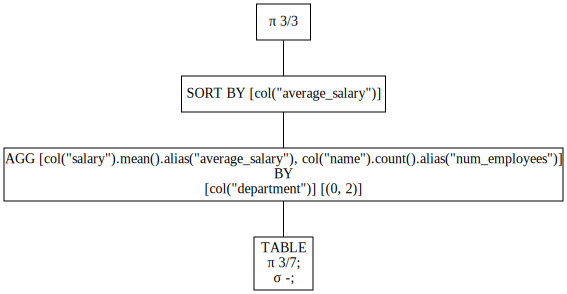

In [25]:
lazy_query.show_graph()